Audio Analysis for CSS systems..

In [13]:
import os
import time
import importlib
from tkinter import Tk
from tkinter import filedialog
import featureExtract_n as ext
importlib.reload(ext)


# Tkinter 루트 윈도우 생성 및 숨김
root = Tk()
root.withdraw()  # 루트 윈도우 숨기기

# 폴더 선택 다이얼로그 표시
# selected_directory = filedialog.askdirectory(title="Select Folder")

#get the timestamp from time module.
current_time = time.strftime("%Y%m%d-%H%M%S")

print(selected_directory)
#extract folder name
# folder_name = os.path.basename(os.path.normpath(selected_directory))

# file_name = f"{folder_name}_{current_time}"
file_name = f'/Volumes/T7/논문/dataset/FSDKaggle2018.audio_test_{current_time}'

buffer = ext.readfile(selected_directory, file_name)
# feature_name = f"{file_name}_{suffix}"
# ext.featureExtract(file_name)

/Volumes/T7/논문/dataset/FSDKaggle2018.audio_test
No existing buffer file found. Processing audio files from /Volumes/T7/논문/dataset/FSDKaggle2018.audio_test.
Buffers have been saved to /Volumes/T7/논문/dataset/FSDKaggle2018.audio_test_20240812-141752.pkl.


In [1]:
import os
import librosa
import numpy as np
import pickle

# Define the path to the directory containing the audio files
directory_path = './FSDKaggle2018.audio_test'

# Define the paths for the pickle files
buffers_pkl_path = 'buffers_kaggle.pkl'
features_pkl_path = 'features_kaggle.pkl'

# Initialize lists to store the buffers and extracted features
buffers = []
features = []

# Check if the buffers pickle file exists
if os.path.exists(buffers_pkl_path):
    # Load buffers from the pickle file
    with open(buffers_pkl_path, 'rb') as f:
        buffers = pickle.load(f)
    print(f"Loaded {len(buffers)} buffers from {buffers_pkl_path}.")

    if os.path.exists(features_pkl_path):
        print("Process finished.")
    else:
        # Extract features from the existing buffers
        for i, (audio_data, sample_rate) in enumerate(buffers):
            # Extract MFCCs
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
            mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of MFCCs along the time axis

            # Extract Spectral Centroid
            spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
            spectral_centroid_mean = np.mean(spectral_centroid)

            # Extract Chroma Features
            chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
            chroma_mean = np.mean(chroma, axis=1)

            # Store the extracted features
            feature_data = {
                'filename': f'buffer_{i}',  # Use a placeholder name if actual filenames are unavailable
                'mfccs_mean': mfccs_mean.tolist(),
                'spectral_centroid_mean': spectral_centroid_mean,
                'chroma_mean': chroma_mean.tolist()
            }
            features.append(feature_data)
        print("Process finished.")
        # Save features to a separate file using pickle
        with open(features_pkl_path, 'wb') as f:
            pickle.dump(features, f)
        print(f"Features have been saved to {features_pkl_path}.")

else:
    print(f"No existing buffer file found. Processing audio files from {directory_path}.")

    # Walk through the directory, including all subdirectories
    for root, _, files in os.walk(directory_path):
        for filename in files:
            if filename.endswith(".wav") or filename.endswith(".mp3"):
                # Construct the full file path
                file_path = os.path.join(root, filename)
                
                # Load the audio file
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                
                # Store the audio data and sample rate in buffers
                buffers.append((audio_data, sample_rate))
                
                # Extract MFCCs
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
                mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of MFCCs along the time axis
                
                # Extract Spectral Centroid
                spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
                spectral_centroid_mean = np.mean(spectral_centroid)
                
                # Extract Chroma Features
                chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
                chroma_mean = np.mean(chroma, axis=1)
                
                # Store the extracted features
                feature_data = {
                    'filename': filename,
                    'mfccs_mean': mfccs_mean.tolist(),
                    'spectral_centroid_mean': spectral_centroid_mean,
                    'chroma_mean': chroma_mean.tolist()
                }
                features.append(feature_data)
    
    # Save buffers to a file using pickle
    with open(buffers_pkl_path, 'wb') as f:
        pickle.dump(buffers, f)
    print(f"Buffers have been saved to {buffers_pkl_path}.")
    # Save features to a separate file using pickle
    with open(features_pkl_path, 'wb') as f:
        pickle.dump(features, f)
    print(f"Features have been saved to {features_pkl_path}.")


No existing buffer file found. Processing audio files from ./FSDKaggle2018.audio_test.


/opt/homebrew/lib/python3.12/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Buffers have been saved to buffers_kaggle.pkl.
Features have been saved to features_kaggle.pkl.


Spectral Centroid (Graph)

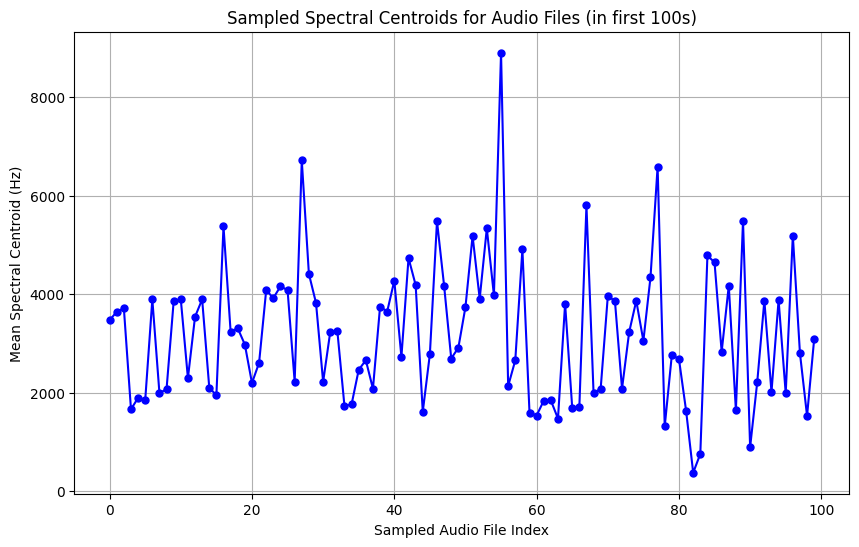

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load feature data from the pickle file
features_pkl_path = 'features.pkl'

try:
    with open(features_pkl_path, 'rb') as f:
        features_list = pickle.load(f)
except FileNotFoundError:
    print(f"File {features_pkl_path} not found.")
    features_list = []

# Extract the spectral centroid values from the features list
centroids_list = []
for feature_data in features_list:
    spectral_centroid_mean = feature_data.get('spectral_centroid_mean')
    if spectral_centroid_mean is not None:
        centroids_list.append(spectral_centroid_mean)

# Check if there are any valid centroids to plot
if not centroids_list:
    print("No valid audio files found or processed.")
else:
    # Convert the list of spectral centroids to a NumPy array
    centroids_array = np.array(centroids_list).reshape(-1, 1)

    # Optional: Reduce the number of data points by sampling
    sample_size = min(100, len(centroids_array))  # Limit to 100 samples
    indices = np.linspace(0, len(centroids_array) - 1, sample_size).astype(int)
    sampled_centroids = centroids_array[indices]

    # Plotting the sampled spectral centroids
    plt.figure(figsize=(10, 6))
    plt.plot(sampled_centroids, marker='o', linestyle='-', color='b', markersize=5)
    plt.title('Sampled Spectral Centroids for Audio Files (in first 100s)')
    plt.xlabel('Sampled Audio File Index')
    plt.ylabel('Mean Spectral Centroid (Hz)')
    plt.grid(True)
    plt.show()


t-SNE'd MFCC Data

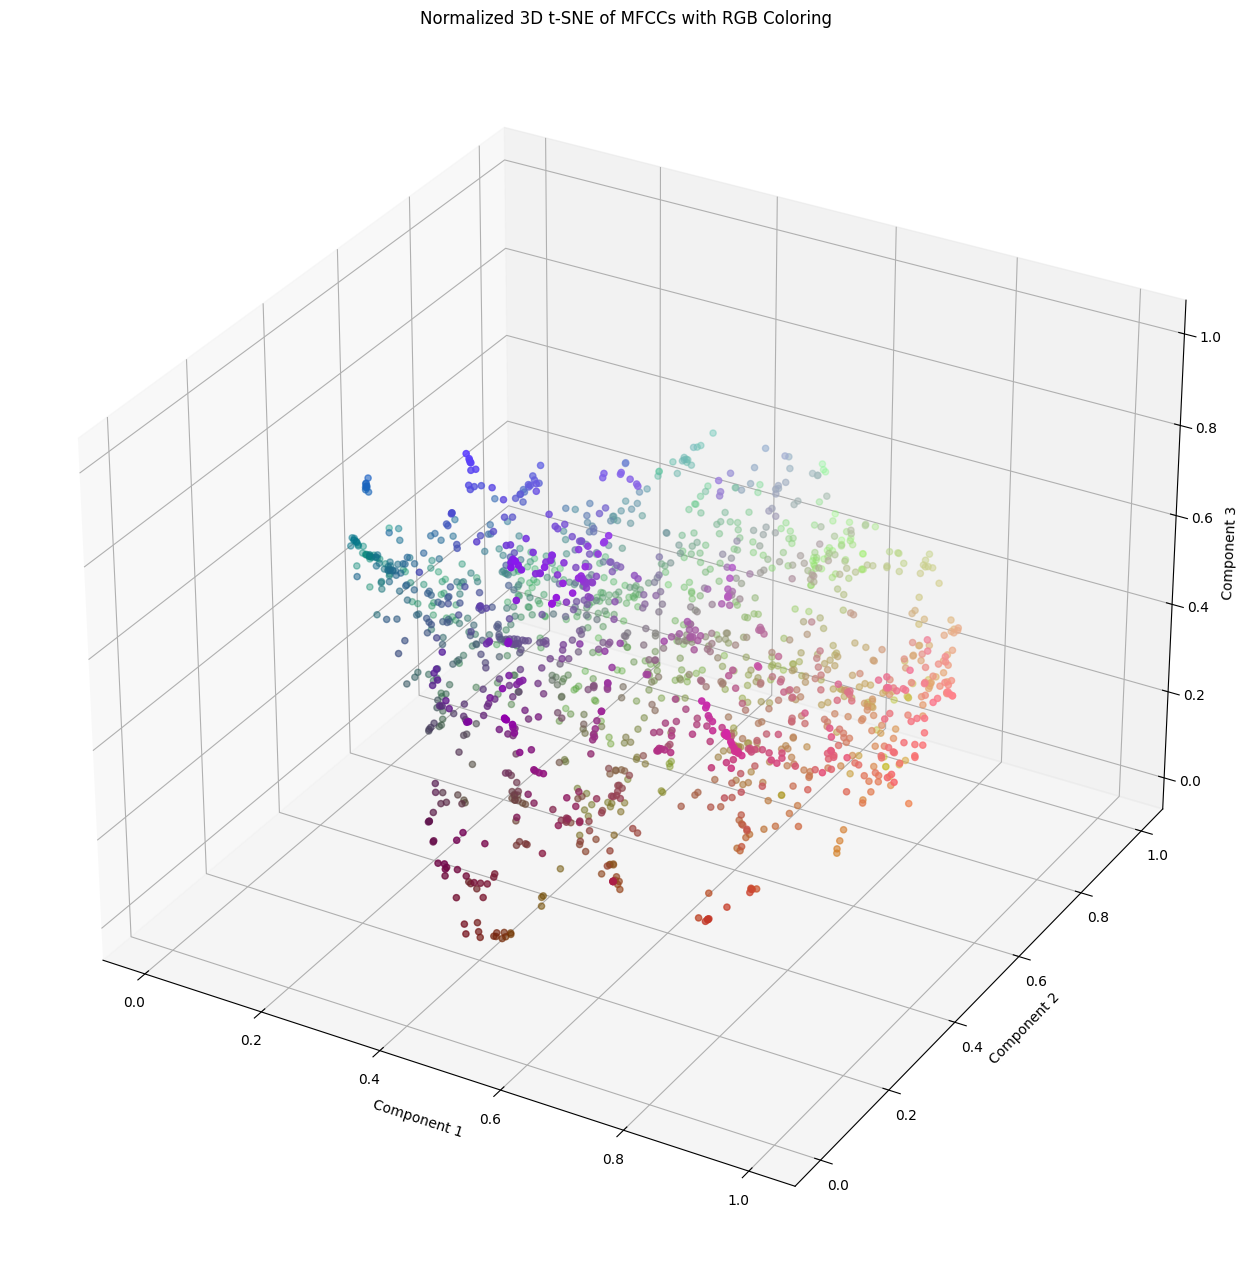

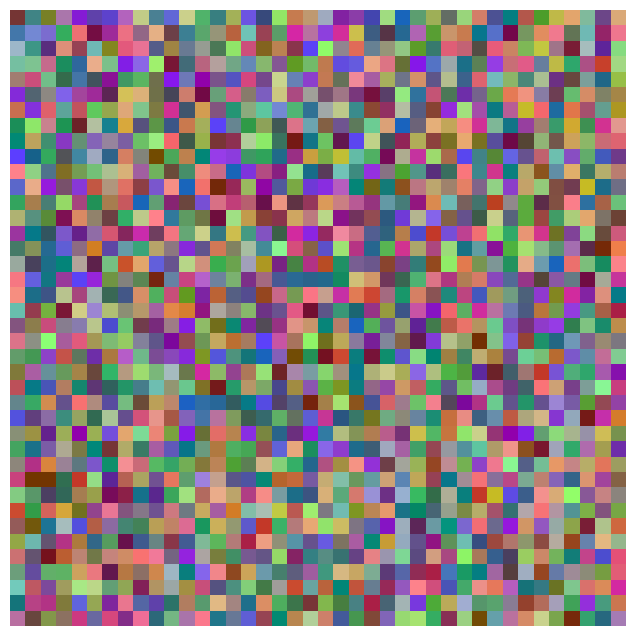

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Load feature data from the pickle file
features_pkl_path = 'FSDKaggle2018.audio_test_20240811-221253features_.pkl'

try:
    with open(features_pkl_path, 'rb') as f:
        features_list = pickle.load(f)
except FileNotFoundError:
    print(f"File {features_pkl_path} not found.")
    features_list = []

# Initialize a list to store extracted MFCCs
mfccs_list = []

# Extract the MFCC values from the features list
for feature_data in features_list:
    mfccs_mean = feature_data.get('mfccs_mean')
    if mfccs_mean is not None:
        # Ensure mfccs_mean is 2D (n_mfcc, n_frames)
        mfccs_mean = np.array(mfccs_mean)
        if mfccs_mean.ndim == 1:  # If stored as 1D, assume it's already mean across time
            mfccs_list.append(mfccs_mean)
        elif mfccs_mean.ndim == 2:
            # Taking the mean across time if it's a 2D array
            mfccs_list.append(np.mean(mfccs_mean, axis=1))

# Check if there are any valid MFCCs
if not mfccs_list:
    print("No valid MFCC data found.")
else:
    # Convert the list of MFCCs to a NumPy array
    mfccs_array = np.array(mfccs_list)

    # Perform t-SNE to reduce dimensionality to 3D
    tsne = TSNE(n_components=3, random_state=0)
    mfccs_3d = tsne.fit_transform(mfccs_array)

    # Normalize the 3D coordinates to fit within the range of -1 to +1
    min_vals = mfccs_3d.min(axis=0)
    max_vals = mfccs_3d.max(axis=0)
    mfccs_3d_normalized = (mfccs_3d - min_vals) / (max_vals - min_vals)

    # Plot the normalized 3D t-SNE result with RGB coloring
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(mfccs_3d_normalized[:, 0], mfccs_3d_normalized[:, 1], mfccs_3d_normalized[:, 2], 
                    c=mfccs_3d_normalized, marker='o')

    ax.set_title('Normalized 3D t-SNE of MFCCs with RGB Coloring')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.show()
    
    # Map the normalized coordinates to RGB values
    colors = mfccs_3d_normalized

    # Determine the grid size for the 2D visualization
    grid_size = int(np.ceil(np.sqrt(len(colors))))
    padded_colors = np.pad(colors, ((0, grid_size**2 - len(colors)), (0, 0)), mode='constant', constant_values=1.0)
    color_grid = padded_colors.reshape((grid_size, grid_size, 3))

    # Plot the colors as a 2D image
    plt.figure(figsize=(8, 8))
    plt.imshow(color_grid)
    plt.axis('off')
    # plt.title('MFCCs t-SNE 3D Coordinates Mapped to RGB Colors')
    plt.show()
